# Proyek Analisis Data: [E-Commerce_Public-dataset]
- **Nama:** [Muhammad Roihan]
- **Email:** [muhammadroihan165@gmail.com]
- **ID Dicoding:** [muhammad_roihan_eIlB]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Bagaimana tren jumlah pengguna sepeda (baik kasual maupun terdaftar) di setiap musim?
- Pertanyaan 2
- Bagaimana pengaruh faktor cuaca (suhu, kelembapan, dan kecepatan angin) terhadap jumlah total pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [8]:
day_df = pd.read_csv("data\day.csv")
hour_df = pd.read_csv("data\hour.csv")

**Insight:**
- Load all data csv
- Load all data csv

### Assessing Data

Assesing Day_df

In [11]:
day_df.info()
# day_df.describe()
# day_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Assesing hour_df

In [8]:
hour_df.info()
# order_items_df.isna().sum()
# print("Jumlah Duplikasi:",order_items_df.duplicated().sum())
# order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Incorrect Data type

## Data Cleaning

Data Cleaning

In [16]:
# 1. Remove duplicates (if any)
day_df_clean = day_df.drop_duplicates()
hour_df_clean = hour_df.drop_duplicates()

# 2. Handle missing values by removing rows with NaN values
# Alternatively, you can fill NaNs with specific values if needed (e.g., mean or median).
day_df_clean = day_df_clean.dropna()
hour_df_clean = hour_df_clean.dropna()

# 3. Convert date columns to datetime format
day_df_clean['dteday'] = pd.to_datetime(day_df_clean['dteday'])
hour_df_clean['dteday'] = pd.to_datetime(hour_df_clean['dteday'])

# 4. Remove irrelevant or redundant columns (optional)
# Since 'instant' is just an index, it might not be needed. If required, it can be dropped.
day_df_clean = day_df_clean.drop(columns=['instant'])
hour_df_clean = hour_df_clean.drop(columns=['instant'])

# 5. Review cleaned data (optional)
# print(day_df_clean.head())
# print(hour_df_clean.head())

day_df_clean.to_csv('data/day_clean.csv', index=False)
hour_df_clean.to_csv('data/hour_clean.csv', index=False)


      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0 2011-01-01       1   0     1        0        6           0           2   
1 2011-01-02       1   0     1        0        0           0           2   
2 2011-01-03       1   0     1        0        1           1           1   
3 2011-01-04       1   0     1        0        2           1           1   
4 2011-01-05       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654   985  
1  0.363478  0.353739  0.696087   0.248539     131         670   801  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600  
      dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0 2011-01-01       1   0     1   0   

## Exploratory Data Analysis (EDA)

Summary Statistics

Day Dataset Summary Statistics:
                    dteday      season          yr        mnth     holiday  \
count                  731  731.000000  731.000000  731.000000  731.000000   
mean   2012-01-01 00:00:00    2.496580    0.500684    6.519836    0.028728   
min    2011-01-01 00:00:00    1.000000    0.000000    1.000000    0.000000   
25%    2011-07-02 12:00:00    2.000000    0.000000    4.000000    0.000000   
50%    2012-01-01 00:00:00    3.000000    1.000000    7.000000    0.000000   
75%    2012-07-01 12:00:00    3.000000    1.000000   10.000000    0.000000   
max    2012-12-31 00:00:00    4.000000    1.000000   12.000000    1.000000   
std                    NaN    1.110807    0.500342    3.451913    0.167155   

          weekday  workingday  weathersit        temp       atemp         hum  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.997264    0.683995    1.395349    0.495385    0.474354    0.627894   
min      0.000000    0

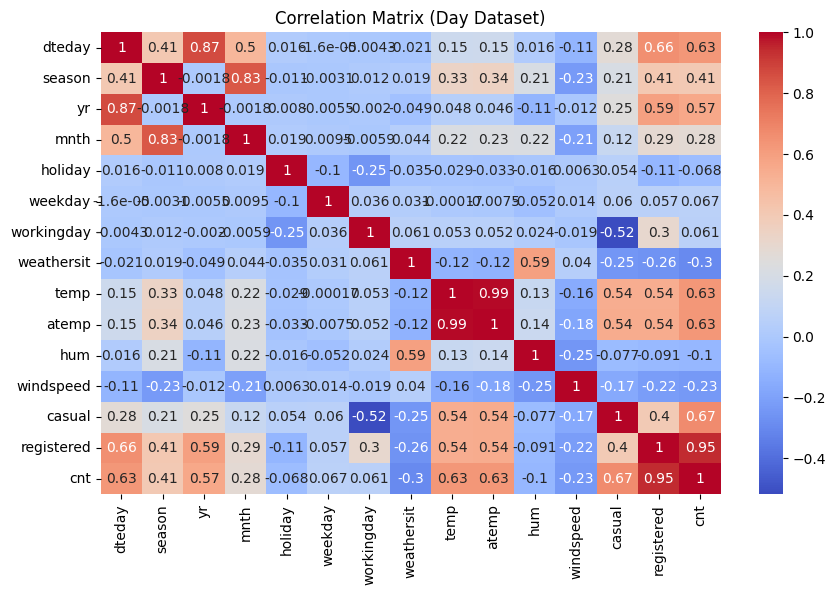

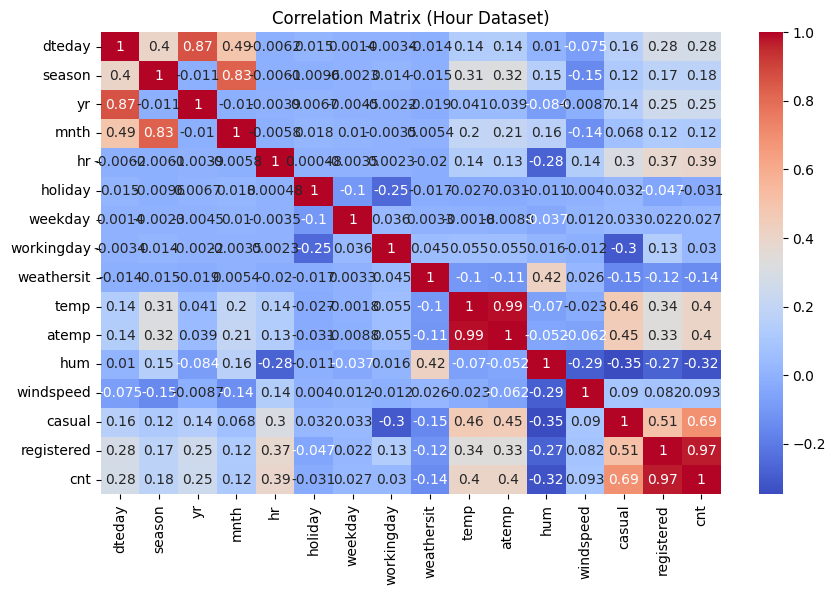

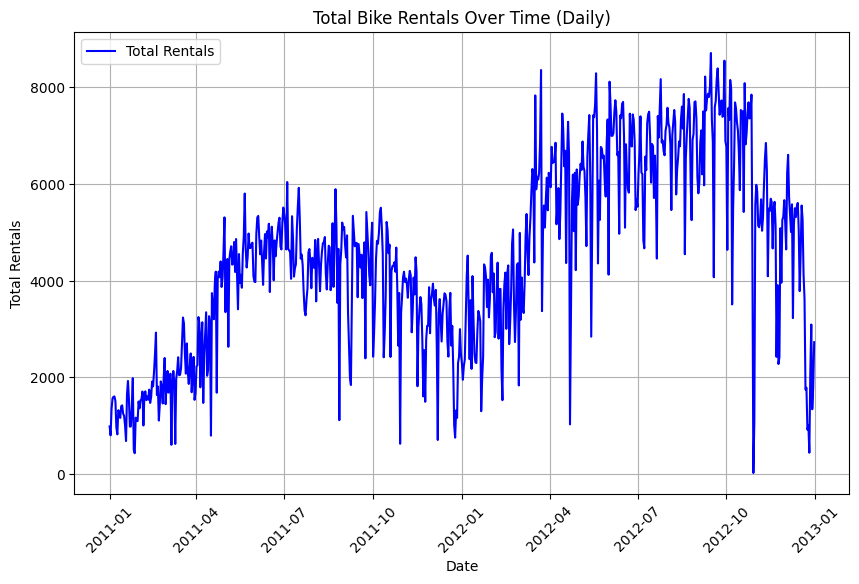

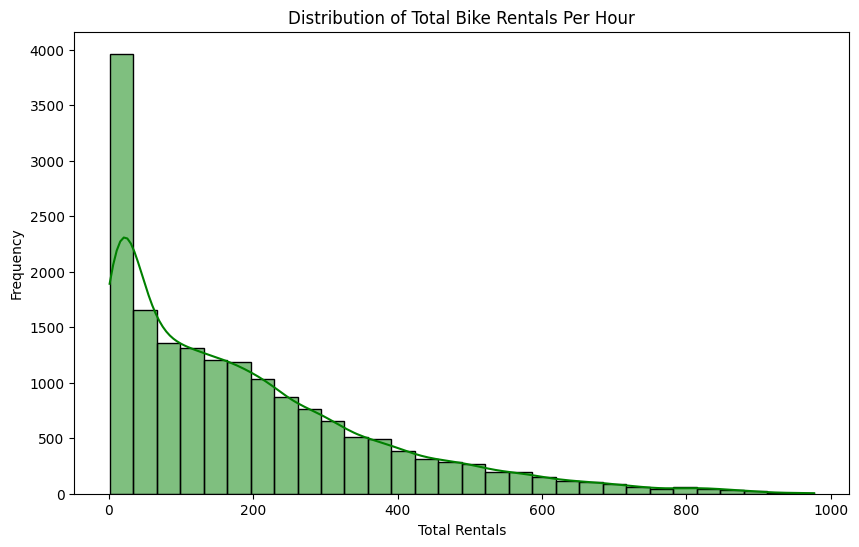

C:\Users\AI\AppData\Local\Temp\ipykernel_14756\14175222.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df_clean, errorbar=None, palette="muted")


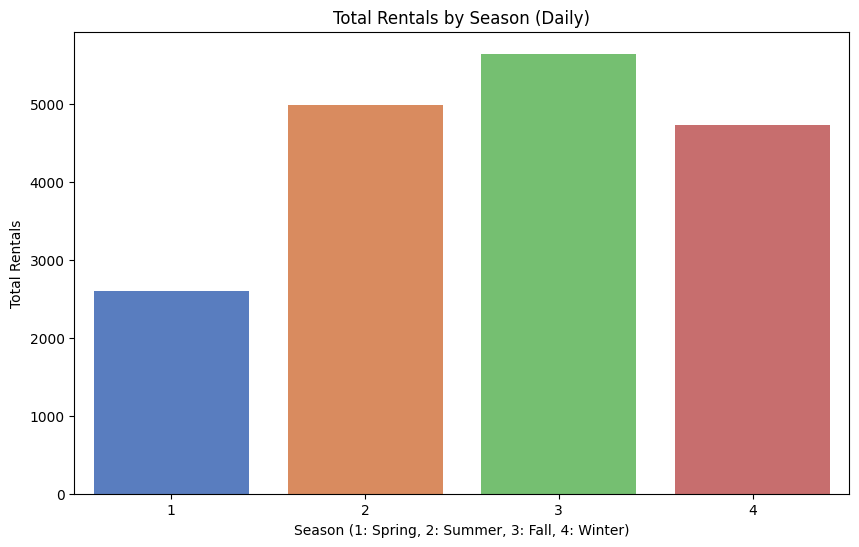

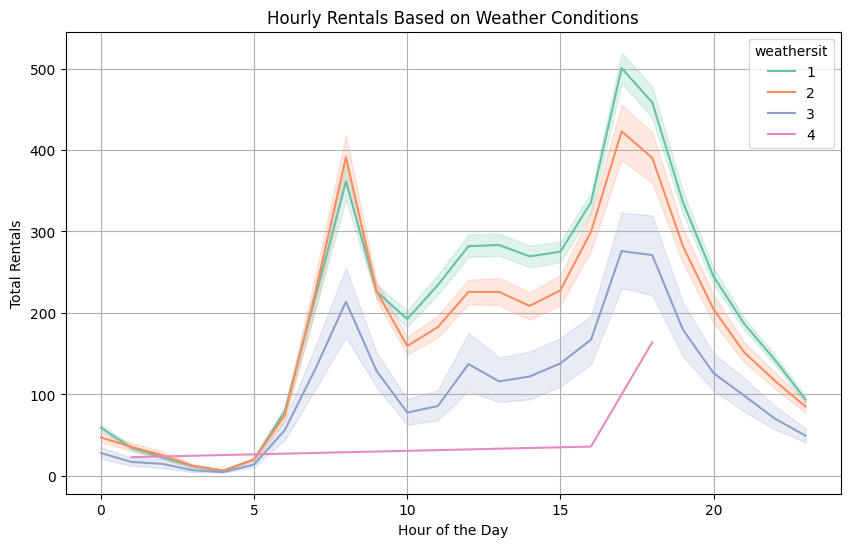

In [25]:
# 1. Summary statistics for day and hour datasets
print("Day Dataset Summary Statistics:")
print(day_df_clean.describe())

print("\nHour Dataset Summary Statistics:")
print(hour_df_clean.describe())

Correlation Day dataset and Hour dataset

In [ ]:
# 2. Correlation matrix (to understand relationships between variables)
plt.figure(figsize=(10, 6))
sns.heatmap(day_df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Day Dataset)")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(hour_df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Hour Dataset)")
plt.show()

Time plot of total bike rentals per day(day dataset)

In [ ]:
# 3. Time series plot of total bike rentals per day
plt.figure(figsize=(10, 6))
plt.plot(day_df_clean['dteday'], day_df_clean['cnt'], label='Total Rentals', color='blue')
plt.title("Total Bike Rentals Over Time (Daily)")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Distribution of rental counts per hour(hour dataset)

In [ ]:
# 4. Distribution of rental counts per hour
plt.figure(figsize=(10, 6))
sns.histplot(hour_df_clean['cnt'], kde=True, bins=30, color='green')
plt.title("Distribution of Total Bike Rentals Per Hour")
plt.xlabel("Total Rentals")
plt.ylabel("Frequency")
plt.show()

Count of rentals by season (Day dataset)

In [ ]:
# 5. Count of rentals by season (Day Dataset)
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=day_df_clean, errorbar=None, palette="muted")
plt.title("Total Rentals by Season (Daily)")
plt.xlabel("Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Total Rentals")
plt.show()

Hourly rental trends across different weather conditions(hour dataset)

In [ ]:
# 6. Hourly rental trends across different weather conditions
plt.figure(figsize=(10, 6))
sns.lineplot(data=hour_df_clean, x='hr', y='cnt', hue='weathersit', palette='Set2')
plt.title("Hourly Rentals Based on Weather Conditions")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rentals")
plt.grid(True)
plt.show()

**insight**
- Summary statistics: Shows descriptive statistics (mean, standard deviation, min, max, etc.) for both datasets.
- Correlation matrix: Heatmap of correlations between the numerical variables to identify strong relationships.
- Time series plot: Visualizes the trend of total bike rentals over time on a daily level.
- Distribution analysis: Histogram for hourly rental counts and their frequency.
- Seasonal rental trends: Bar plot to show how bike rentals vary by season.
- Hourly trends by weather conditions: Line plot showing how rentals change by the hour, based on weather conditions.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

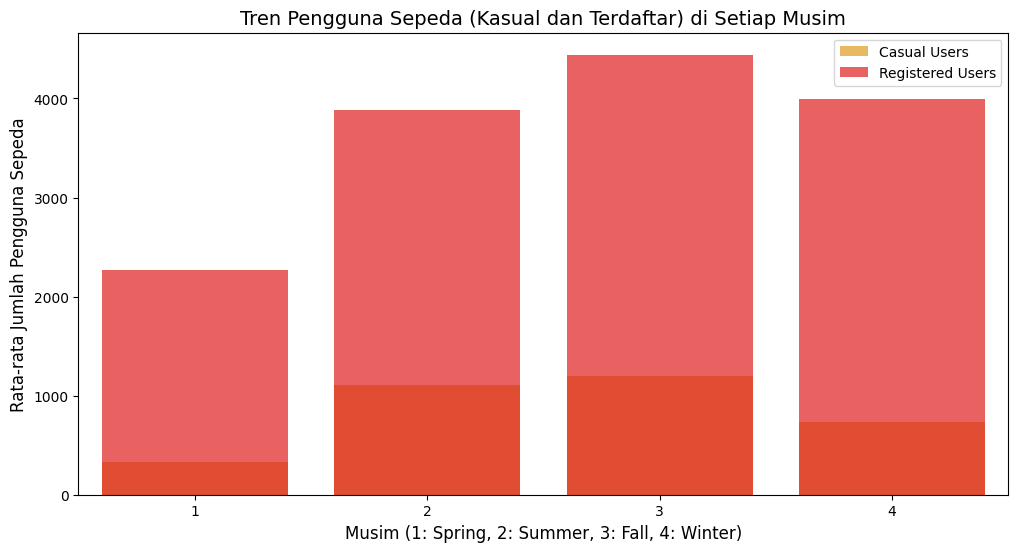

In [15]:
# Visualization for Pertanyaan 1
# Group data by season and calculate mean values for casual and registered users
seasonal_means = day_df_clean.groupby('season')[['casual', 'registered']].mean().reset_index()

# Plot side-by-side bar plot for casual and registered users
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='casual', data=seasonal_means, label='Casual Users', color='orange', alpha=0.7)
sns.barplot(x='season', y='registered', data=seasonal_means, label='Registered Users', color='red', alpha=0.7)

plt.title("Tren Pengguna Sepeda (Kasual dan Terdaftar) di Setiap Musim", fontsize=14)
plt.xlabel("Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)", fontsize=12)
plt.ylabel("Rata-rata Jumlah Pengguna Sepeda", fontsize=12)

# Show the legend
plt.legend()
plt.show()

**Pertanyaan 1**
- Tren Musiman Pengguna Kasual dan Terdaftar:
Dari grafik, kita bisa melihat bahwa baik pengguna kasual maupun pengguna terdaftar lebih banyak menggunakan sepeda selama musim panas (summer) dan gugur (fall). Penggunaan sepeda paling rendah terjadi pada musim dingin (winter).
- Pengguna terdaftar lebih stabil sepanjang musim, tetapi ada penurunan pada musim dingin.
- Pengguna kasual menunjukkan fluktuasi yang lebih besar, dengan lonjakan penggunaan pada musim panas dan penurunan tajam di musim dingin.
- Interpretasi: Ini menunjukkan bahwa pengguna terdaftar cenderung lebih sering menggunakan sepeda terlepas dari musim, mungkin untuk bekerja atau keperluan sehari-hari, sementara pengguna kasual lebih dipengaruhi oleh cuaca atau kegiatan rekreasi.

### Pertanyaan 2:

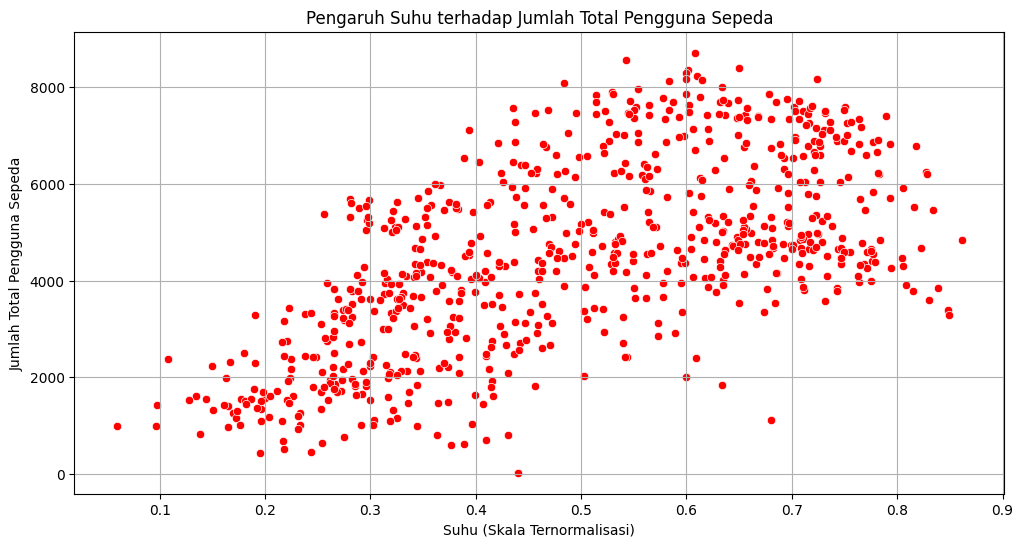

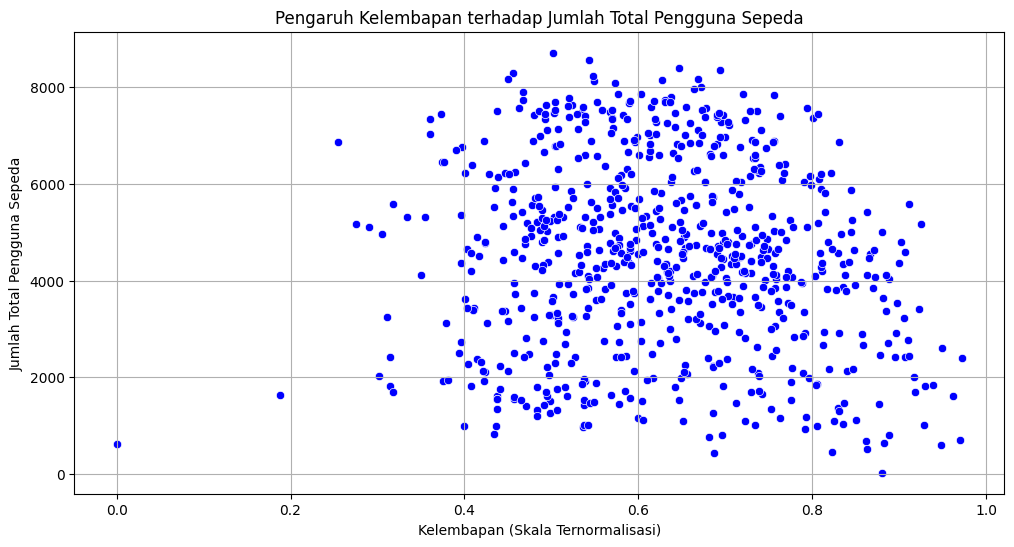

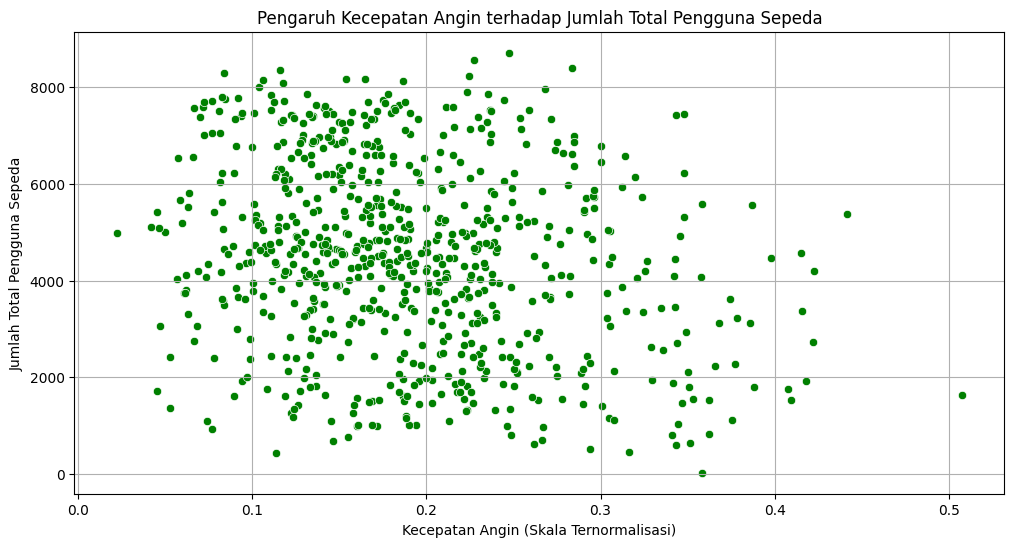

In [24]:
# Visualization for Pertanyaan 2 (Temperature vs Total Users)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df_clean, color='red')
plt.title("Pengaruh Suhu terhadap Jumlah Total Pengguna Sepeda")
plt.xlabel("Suhu (Skala Ternormalisasi)")
plt.ylabel("Jumlah Total Pengguna Sepeda")
plt.grid(True)
plt.show()

# Visualization for Pertanyaan 2 (Humidity vs Total Users)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hum', y='cnt', data=day_df_clean, color='blue')
plt.title("Pengaruh Kelembapan terhadap Jumlah Total Pengguna Sepeda")
plt.xlabel("Kelembapan (Skala Ternormalisasi)")
plt.ylabel("Jumlah Total Pengguna Sepeda")
plt.grid(True)
plt.show()

# Visualization for Pertanyaan 2 (Windspeed vs Total Users)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='windspeed', y='cnt', data=day_df_clean, color='green')
plt.title("Pengaruh Kecepatan Angin terhadap Jumlah Total Pengguna Sepeda")
plt.xlabel("Kecepatan Angin (Skala Ternormalisasi)")
plt.ylabel("Jumlah Total Pengguna Sepeda")
plt.grid(True)
plt.show()


**Pertanyaan 2**
- Tren Musiman Pengguna Kasual dan Terdaftar:
Dari grafik, kita bisa melihat bahwa baik pengguna kasual maupun pengguna terdaftar lebih banyak menggunakan sepeda selama musim panas (summer) dan gugur (fall). Penggunaan sepeda paling rendah terjadi pada musim dingin (winter).
- Pengguna terdaftar lebih stabil sepanjang musim, tetapi ada penurunan pada musim dingin.
- Pengguna kasual menunjukkan fluktuasi yang lebih besar, dengan lonjakan penggunaan pada musim panas dan penurunan tajam di musim dingin.
- Interpretasi: Ini menunjukkan bahwa pengguna terdaftar cenderung lebih sering menggunakan sepeda terlepas dari musim, mungkin untuk bekerja atau keperluan sehari-hari, sementara pengguna kasual lebih dipengaruhi oleh cuaca atau kegiatan rekreasi.

## Conclusion

- Musim panas dan gugur adalah waktu dengan penggunaan sepeda tertinggi, sementara musim dingin melihat penurunan yang signifikan, terutama di antara pengguna kasual.
- Suhu adalah faktor cuaca yang paling mempengaruhi penggunaan sepeda, dengan lebih banyak orang bersepeda pada suhu yang lebih hangat.
- Kelembapan dan kecepatan angin cenderung mengurangi penggunaan sepeda, meskipun dampaknya tidak sebesar suhu.